In [51]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
data = pd.read_excel('fully-supervised.xlsx')

In [53]:
data

,Keypoint,antelope,bobcat,buffalo,chihuahua,collie,cow,dalmatian,deer,elephant,...,raccoon,rhinoceros,sheep,siamese+cat,skunk,squirrel,tiger,weasel,wolf,zebra
0,nose,0.94,0.84,0.95,0.83,0.95,0.82,1.00,0.95,0.78,...,0.89,0.80,1.00,0.88,0.95,0.94,1.00,0.95,1.00,0.95
1,upper_jaw,0.89,0.95,0.89,0.71,0.89,1.00,0.94,1.00,0.71,...,1.00,0.85,0.94,1.00,0.89,0.94,1.00,0.89,0.89,0.89
2,lower_jaw,0.88,0.95,0.81,0.94,0.94,0.69,0.94,0.89,0.76,...,0.75,0.78,0.89,0.93,0.82,0.82,0.88,0.88,0.83,0.82
3,mouth_end_right,1.00,0.57,0.67,0.57,0.92,0.44,0.83,0.82,1.00,...,0.60,0.88,0.94,1.00,0.64,0.64,1.00,0.83,0.85,1.00
4,mouth_end_left,0.80,0.86,1.00,0.78,0.92,0.50,0.91,1.00,0.88,...,0.80,0.89,0.69,0.86,0.67,0.60,0.87,0.78,0.86,0.75
5,right_eye,0.92,0.94,1.00,0.93,0.89,0.79,0.91,1.00,0.91,...,0.88,1.00,0.94,0.88,0.87,0.94,1.00,1.00,1.00,1.00
6,right_earbase,0.94,0.80,1.00,0.67,0.80,0.67,0.67,0.89,0.70,...,0.78,0.94,0.84,0.94,0.50,0.79,1.00,0.89,0.78,0.93
7,right_earend,0.84,0.53,0.67,0.84,0.60,0.88,0.73,0.89,0.90,...,0.89,0.89,0.95,0.94,0.56,0.89,1.00,0.95,0.94,0.94
8,right_antler_base,0.64,-1.00,0.89,-1.00,-1.00,0.67,-1.00,0.78,-1.00,...,-1.00,-1.00,0.67,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
9,right_antler_end,0.50,-1.00,0.80,-1.00,-1.00,0.67,-1.00,0.44,-1.00,...,-1.00,-1.00,0.33,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00


In [54]:
#remove keypoint name column
df = data.iloc[: , 1:]
df[df < 0] = 0
df = df.T
#remove average column
df = df.iloc[: , :-1]
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
antelope,0.94,0.89,0.88,1.00,0.80,0.92,0.94,0.84,0.64,0.50,...,0.63,0.63,0.71,0.56,0.61,0.63,0.67,0.72,0.80,0.67
bobcat,0.84,0.95,0.95,0.57,0.86,0.94,0.80,0.53,0.00,0.00,...,0.18,0.20,0.30,0.33,0.33,0.33,0.10,0.50,0.36,0.00
buffalo,0.95,0.89,0.81,0.67,1.00,1.00,1.00,0.67,0.89,0.80,...,0.31,0.24,0.79,0.75,0.44,0.80,0.39,0.44,0.00,0.36
chihuahua,0.83,0.71,0.94,0.57,0.78,0.93,0.67,0.84,0.00,0.00,...,0.33,0.43,0.56,0.50,0.10,0.75,0.36,0.50,0.11,0.20
collie,0.95,0.89,0.94,0.92,0.92,0.89,0.80,0.60,0.00,0.00,...,0.32,0.29,0.60,0.29,0.58,0.69,0.44,0.38,0.25,0.73
cow,0.82,1.00,0.69,0.44,0.50,0.79,0.67,0.88,0.67,0.67,...,0.57,0.33,0.64,0.58,0.50,0.64,0.45,0.45,0.44,0.44
dalmatian,1.00,0.94,0.94,0.83,0.91,0.91,0.67,0.73,0.00,0.00,...,0.69,0.33,0.36,0.13,0.58,0.42,0.43,0.40,0.33,0.43
deer,0.95,1.00,0.89,0.82,1.00,1.00,0.89,0.89,0.78,0.44,...,0.71,0.67,0.80,0.44,0.67,0.69,0.69,0.53,0.45,0.44
elephant,0.78,0.71,0.76,1.00,0.88,0.91,0.70,0.90,0.00,0.00,...,0.39,0.82,0.53,0.64,0.31,0.69,0.61,0.94,0.67,0.20
fox,0.95,0.84,0.74,0.67,0.71,1.00,0.65,0.89,0.00,0.00,...,0.60,0.73,0.56,0.62,0.25,0.79,0.40,0.56,0.50,0.36


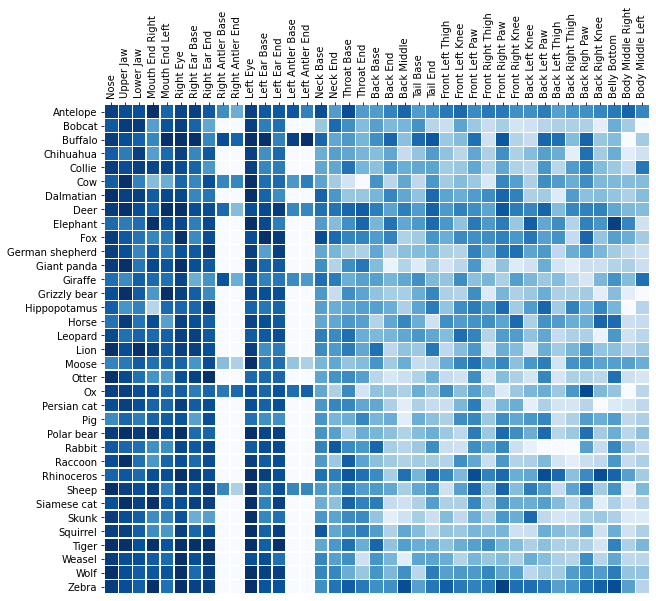

In [55]:
# figure
fig, ax = plt.subplots(figsize=(11, 9))

#remove keypoint name column
df = data.iloc[: , 1:]
df[df < 0] = 0
df = df.T
#remove average column
df = df.iloc[: , :-1]

# plot heatmap
# sns.heatmap(df, cmap="Blues", vmin= 0, vmax=1.0, square=True,
#            linewidth=0.3, cbar_kws = dict(shrink= .8, use_gridspec=False,location="bottom"))
sns.heatmap(df, cmap="Blues", vmin= 0, vmax=1.0, square=True,
           linewidth=0.3, cbar = False)
# xticks
ax.xaxis.tick_top()
xticks_labels = ['Nose',
 'Upper Jaw',
 'Lower Jaw',
 'Mouth End Right',
 'Mouth End Left',
 'Right Eye',
 'Right Ear Base',
 'Right Ear End',
 'Right Antler Base',
 'Right Antler End',
 'Left Eye',
 'Left Ear Base',
 'Left Ear End',
 'Left Antler Base',
 'Left Antler End',
 'Neck Base',
 'Neck End',
 'Throat Base',
 'Throat End',
 'Back Base',
 'Back End',
 'Back Middle',
 'Tail Base',
 'Tail End',
 'Front Left Thigh',
 'Front Left Knee',
 'Front Left Paw',
 'Front Right Thigh',
 'Front Right Paw',
 'Front Right Knee',
 'Back Left Knee',
 'Back Left Paw',
 'Back Left Thigh',
 'Back Right Thigh',
 'Back Righ Paw',
 'Back Right Knee',
 'Belly Bottom',
 'Body Middle Right',
 'Body Middle Left']
plt.xticks(np.arange(39) + .5, labels=xticks_labels, rotation='vertical')

# yticks
#ax.yaxis.tick_top()
yticks_labels = ['Moose',
 'Otter',
 'Ox',
 'Persian cat',
 'Pig',
 'Polar bear',
 'Rabbit',
 'Raccoon',
 'Fox',
 'German shepherd',
 'Giant panda',
 'Giraffe',
 'Grizzly bear',
 'Hippopotamus',
 'Horse',
 'Leopard',
 'Lion',
 'Rhinoceros',
 'Sheep',
 'Siamese cat',
 'Skunk',
 'Squirrel',
 'Tiger',
 'Weasel',
 'Wolf',
 'Zebra',
 'Antelope',
 'Bobcat',
 'Buffalo',
 'Chihuahua',
 'Collie',
 'Cow',
 'Dalmatian',
 'Deer',
 'Elephant']
yticks_labels.sort()
plt.yticks(np.arange(35) + .5, labels=yticks_labels)


# axis labels
plt.xlabel('')
plt.ylabel('')
# title
#title = 'monthly Average exchange rate\nValue of one USD in CAD\n'.upper()
#plt.title(title, loc='left')
plt.show()
fig.savefig("heatmap.png", bbox_inches='tight', dpi=600)